<a href="https://colab.research.google.com/github/gregh13/Exploring-Supervised-vs-Unsupervised-Learning-ML-TensorFlow/blob/main/Supervised_vs_Unsupervised_Leaning_in_API_Security_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp
import scipy.stats as stats



In [2]:
df_raw = pd.read_csv("supervised_dataset.csv")

In [3]:
df_raw.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1699 non-null   int64  
 1   _id                             1699 non-null   object 
 2   inter_api_access_duration(sec)  1695 non-null   float64
 3   api_access_uniqueness           1695 non-null   float64
 4   sequence_length(count)          1699 non-null   float64
 5   vsession_duration(min)          1699 non-null   int64  
 6   ip_type                         1699 non-null   object 
 7   num_sessions                    1699 non-null   float64
 8   num_users                       1699 non-null   float64
 9   num_unique_apis                 1699 non-null   float64
 10  source                          1699 non-null   object 
 11  classification                  1699 non-null   object 
dtypes: float64(6), int64(2), object(4)

In [5]:
df_raw.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,1699.00000,1695.000000,1695.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,849.00000,1.501123,0.173226,61.648982,6.028341e+03,564.726898,406.263685,67.246616
std,490.60337,21.697558,0.283641,205.803273,4.665042e+04,1179.931200,960.718580,82.189214
min,0.00000,0.000003,0.001200,0.000000,1.000000e+00,2.000000,1.000000,0.000000
25%,424.50000,0.000707,0.009199,9.984756,6.300000e+01,5.000000,1.000000,14.000000
50%,849.00000,0.002574,0.018717,17.095238,1.950000e+02,164.000000,141.000000,37.000000
75%,1273.50000,0.024579,0.230769,41.349478,3.711500e+03,446.500000,308.500000,90.000000
max,1698.00000,852.929250,1.000000,3303.000000,1.352948e+06,9299.000000,8447.000000,524.000000


In [6]:
df_raw.duplicated().values.any()

False

In [7]:
df_raw.isna().values.any()

True

In [8]:
nan_rows = df_raw[df_raw.isna().values == True]
nan_rows.head(10)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier


In [9]:
df_clean = df_raw.drop(nan_rows.index)
df_clean.shape

(1695, 12)

In [10]:
df = df_clean.drop(['Unnamed: 0', '_id', "source"], axis=1)

In [11]:
quant_class = [(0 if row == "normal" else 1) for row in df["classification"]]
y = np.array(quant_class)
y[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
np.count_nonzero(y == 1)

589

In [13]:
np.count_nonzero(y == 0)

1106

In [14]:
quant_ip_type = [(0 if row == "default" else 1) for row in df["ip_type"]]
df["quant_ip_type"] = quant_ip_type
df.sample(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,classification,quant_ip_type
1394,0.959356,0.370370,108.000000,6217,default,2.0,1.0,40.0,outlier,0
1106,0.002788,0.048822,594.000000,100,default,21.0,1.0,29.0,outlier,0
250,0.003907,0.005867,20.262226,5635,default,1288.0,1186.0,141.0,normal,0
168,0.010032,0.028075,76.185185,4953,default,119.0,108.0,231.0,normal,0
483,0.029118,0.007106,91.775362,22128,default,142.0,138.0,90.0,normal,0
1053,0.000920,0.009944,11.251748,89,default,146.0,143.0,16.0,normal,0
273,0.012659,0.007433,18.705882,5314,default,391.0,374.0,52.0,normal,0
1263,18.789786,0.857143,14.000000,15784,default,2.0,1.0,12.0,outlier,0
52,0.000564,0.004650,75.782119,3412,default,1475.0,1331.0,469.0,normal,0
48,0.000174,0.010595,48.557971,71,default,276.0,138.0,71.0,normal,0


In [15]:
df = df.drop(["classification", "ip_type"], axis=1)
df.sample(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,quant_ip_type
855,0.025912,0.017429,15.198675,3569,152.0,151.0,40.0,0
1145,0.728300,0.520000,25.000000,1093,2.0,1.0,13.0,0
1246,0.006000,0.500000,2.000000,1,2.0,1.0,1.0,0
1254,2.749827,0.230769,52.000000,8580,4.0,1.0,12.0,0
474,0.001228,0.002732,29.552999,5772,3117.0,2651.0,214.0,0
1071,0.001065,0.006040,11.252427,75,102.0,103.0,7.0,0
182,0.000809,0.033794,13.633508,127,351.0,191.0,88.0,0
276,0.005365,0.008270,34.548753,4905,518.0,441.0,126.0,0
433,0.021144,0.010347,42.955556,9810,306.0,180.0,80.0,0
785,0.000007,0.010784,9.112882,3,2846.0,753.0,74.0,0


In [16]:
X_raw = df.to_numpy()
X_raw[1]

array([6.32464613e-05, 2.21146594e-03, 1.61668048e+01, 5.19000000e+02,
       9.29900000e+03, 8.44700000e+03, 3.02000000e+02, 0.00000000e+00])

Now ready to start!

In [18]:
# Easy Way: 
X_easy = stats.zscore(X_raw, axis=0)
print(f"Easy: {X_easy[1,:]}")

# Manual Way:
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X = (X_raw - X_mean) / X_std
print(f"Manual: {X[1,:]}")

# Just for some coding fun
# 'Reinventing the Wheel'/'Sloth Slow' Way:
columns = X_raw.shape[1]
rows = X_raw.shape[0]
X_slow = np.zeros([rows,columns])
mean = np.zeros(columns)
std = np.zeros(columns)
for col in range(columns):
  for i in range(rows):
    mean[col] += X_raw[i,col]
for col in range(columns):
  mean[col] = mean[col] / rows
for col in range(columns):
  for i in range(rows):
    std[col] += ((X_raw[i,col] - mean[col])**2) / rows
std = np.sqrt(std)
for col in range(columns):
  for i in range(rows):
    X_slow[i,col] = (X_raw[i,col] - mean[col]) / std[col]

print(f"Stone Age: {X_slow[1,:]}")


  



Easy: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]
Manual: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]
Stone Age: [-0.06920146 -0.60310385 -0.22153276 -0.11830091  7.39667288  8.36286794
  2.85405856 -0.3149949 ]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (1017, 8) y_train.shape (1017,)
X_test.shape (678, 8) y_test.shape (678,)


In [20]:
model = Sequential(
    [
      Dense(units=16, activation="relu"),
      Dense(units=8, activation="relu"),
      Dense(units=1, activation="sigmoid", name="L3")
    ], name="NN"
)
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(0.01)
)

In [21]:
model.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.3167
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 9.7789e-04
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 8.9306e-04
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.0557e-04
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1913e-04
Epoch 11/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3688e-04
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0668e-04
Epoch 13/100


In [22]:
model.summary()

Model: "NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 L3 (Dense)                  (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [224]:
def calc_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    correct = 0
    for i in range(m):
        #print(f"Before: {yhat[i]}, {y[i]}")
        if yhat[i] < 0.5:
          yhat[i] = 0
        else:
          yhat[i] = 1
        #print(f"After: {yhat[i]}, {y[i]}")  
        if yhat[i] != y[i]:
            incorrect += 1
        else:
            correct += 1
    print(f"\n\n\nNumber of incorrect predictions: {incorrect}")
    print(f"Correct predictions: {correct} out of {m}\n")
    cerr = incorrect / m
    return(cerr)

In [24]:
training_classification_error = calc_cat_err(y_train, model.predict(X_train))
test_classification_error = calc_cat_err(y_test, model.predict(X_test))
print(f"categorization error, training,    NN model: {training_classification_error:0.5f}")
print(f"categorization error, test,        NN model: {test_classification_error:0.5f}")

Before: [3.99578e-11], 0
After: [0.], 0
Before: [4.4902208e-07], 0
After: [0.], 0
Before: [3.3170883e-07], 0
After: [0.], 0
Before: [7.440962e-11], 0
After: [0.], 0
Before: [1.5523018e-12], 0
After: [0.], 0
Before: [4.5391007e-09], 0
After: [0.], 0
Before: [6.3388455e-08], 0
After: [0.], 0
Before: [3.579177e-08], 0
After: [0.], 0
Before: [1.0444802e-05], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [5.347557e-07], 0
After: [0.], 0
Before: [4.5447274e-07], 0
After: [0.], 0
Before: [6.8621935e-06], 0
After: [0.], 0
Before: [2.03781e-08], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [2.6782126e-07], 0
After: [0.], 0
Before: [9.214177e-11], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [3.6467588e-07], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [1.], 1
After: [1.], 1
Before: [5.089586e-09], 0
After: [0.], 0
Before: [1.], 1
After: [1.], 1
Before: [3.94216

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


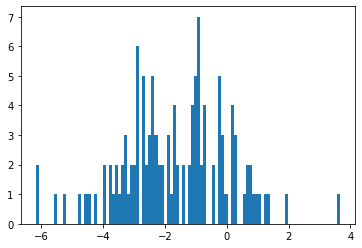

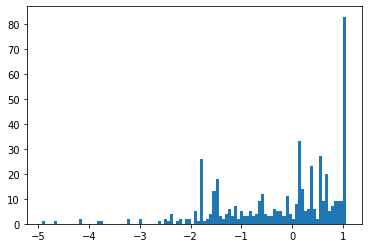

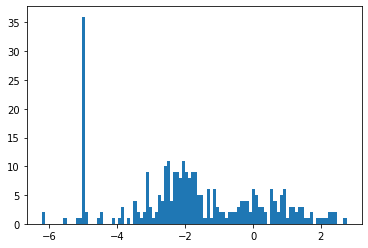

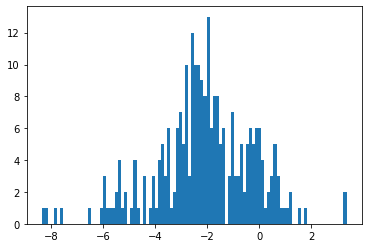

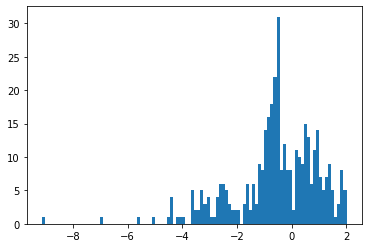

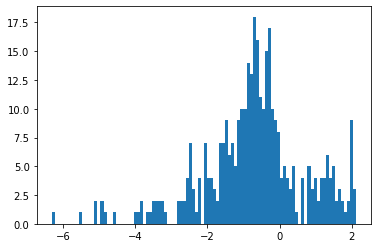

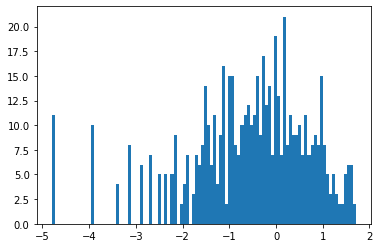

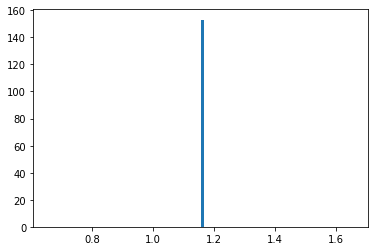

In [25]:
for i in range(X.shape[1]):
  plt.hist(np.log(X[:,i]+0.001), bins=100)
  plt.show()


Now Try k-means unsupervised learning

In [26]:
# Calculates mean and variance of all features in the dataset
def estimate_gaussian(X): 
    m, n = X.shape
    mu = np.zeros(n)
    var = np. zeros(n)
    # Loops through every item in dataset
    for i in range(m):
        # Loops through each feature in a specific item
        for j in range(n):
            mu[j] += (X[i][j] / m)
    
    for i in range(m):
        for j in range(n):
            var[j] += ((X[i][j] - mu[j])**2) / m
        
    return mu, var

In [27]:
# Returns the density of the multivariate normal at each data point of X_train
def calc_multivariate_gaussian(X, mu, var):
    mvn = tfp.distributions.MultivariateNormalDiag(
        loc=mu,
        scale_diag=var)
    p = mvn.prob(X).numpy()
    
    return p

In [28]:
# Finds the best threshold to use for selecting outliers based on the results 
# from a validation set (p_val) and the ground truth (y_val)
def select_threshold(y_val, p_val): 
    counter = 0
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    true_pos = 0
    false_pos = 0
    false_neg = 0
    m = p_val.shape[0]
    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        p_decision = np.zeros(m)
        tp = 0
        fp = 0
        fn = 0
        
        for i in range(m):
            # Turns probability values into decision based on epsilon value
            if p_val[i] < epsilon:
                p_decision[i] = 1
                
            # Checks the predicted decision against the ground truth    
            if p_decision[i] and y_val[i] == 1:
                tp += 1
            else:
                # Checks for false positive (predict 1, actual is 0)
                if p_decision[i] > y_val[i]:
                    fp += 1
                # Checks for false negative (predict 0, actual is 1)
                elif p_decision[i] < y_val[i]:
                    fn += 1
        if tp != 0:
            prec = tp / (tp + fp)
            rec = tp / (tp + fn)
            F1 = (2*prec*rec) / (prec + rec)
        else:
            F1 = 0

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
            true_pos = tp
            false_pos = fp
            false_neg = fn
        
    return best_epsilon, best_F1, true_pos, false_pos, false_neg

In [175]:
X_log = X_raw
for i in range(7):
  X_log[:,i] = np.log(X_raw[:,i] + 0.00000001)

In [176]:
X_log.shape

(1695, 8)

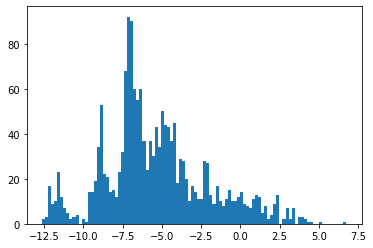

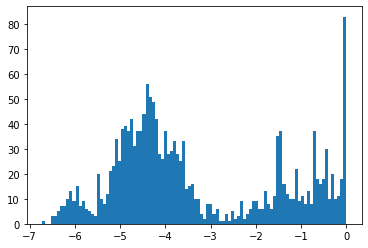

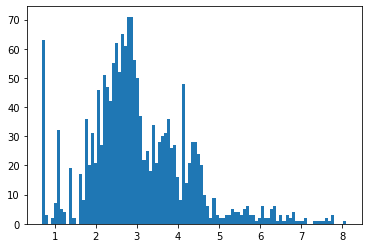

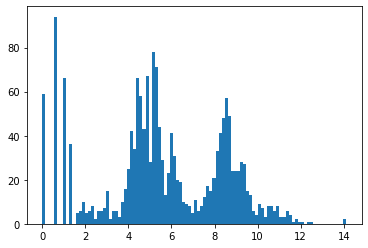

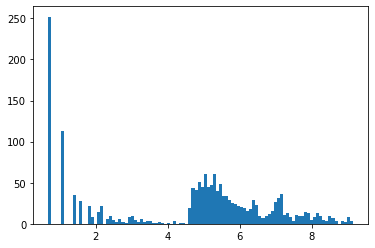

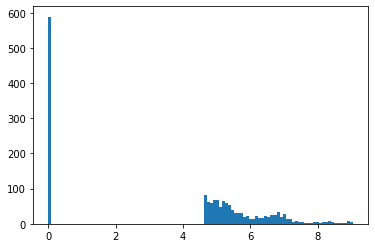

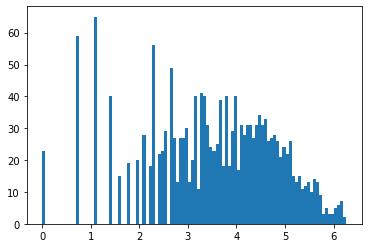

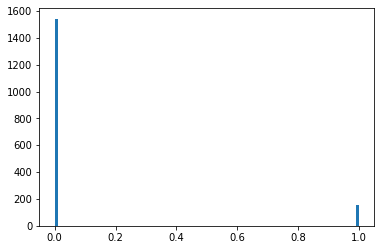

In [186]:
for i in range(X_log.shape[1]):
  plt.hist(X_log[:,i], bins=100)
  plt.show()

In [187]:
X_log_z = stats.zscore(X_log, axis=0)

In [199]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_log_z,y,test_size=0.4, random_state=1)
print("X_train_1.shape", X_train_1.shape)
print("X_val.shape", X_val.shape, "y_val.shape", y_val.shape)

X_train_1.shape (1017, 8)
X_val.shape (678, 8) y_val.shape (678,)


In [200]:
# Estimate the Gaussian parameters
mu, var = estimate_gaussian(X_train_1)    

# Evaluate the probabilites for the validation set
p_val = calc_multivariate_gaussian(X_val, mu, var)

# Evaluate the probabilites for the test set
p = calc_multivariate_gaussian(X_train_1, mu, var)

In [201]:
# Find the best threshold
epsilon, F1, tp, fp, fn = select_threshold(y_val, p_val)
anomalies = sum(p_val < epsilon)
print('Best epsilon found using cross-validation: %e'% epsilon)
print('Best F1 on Cross Validation Set:  %f'% F1)
print('Model Reported Anomalies: %d'% anomalies)
actual_anomalies = np.count_nonzero(y_val == 1)
print(f"Actual Number of Anomalies: {actual_anomalies}")

Best epsilon found using cross-validation: 8.951474e-06
Best F1 on Cross Validation Set:  0.802444
Model Reported Anomalies: 267
Actual Number of Anomalies: 224


In [195]:
print("Cross Validation Sample Results")
print(f"True positives = {tp}")
print(f"False positives = {fp}")
print(f"False negatives = {fn}")

Cross Validation Sample Results
True positives = 195
False positives = 80
False negatives = 29


Let's try training it on a much larger dataset

In [33]:
df_large_raw = pd.read_csv("remaining_behavior_ext.csv")

In [34]:
df_large_raw.head(5)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,0,024aae60-1a81-3f37-bbe6-3f832c919706,7.010387,0.419355,31.0,13040,default,outlier,outlier,1.0,1.0,13.0,E
1,1,028d67dd-c6d0-329f-a20e-78db9eab7a55,51.419393,0.252336,107.0,330113,default,outlier,outlier,1.0,1.0,27.0,E
2,2,02d12bf9-5fe2-3d0c-b233-30e02224b686,25.860775,0.275000,40.0,62066,default,outlier,outlier,1.0,1.0,11.0,E
3,3,0b3aee1e-dc3b-3728-bc55-f57a23446b3d,0.205909,0.818182,11.0,136,default,outlier,outlier,1.0,1.0,9.0,E
4,4,0dbfffb4-3ed4-3cb2-904d-c348501a996e,0.122125,0.812500,16.0,118,default,outlier,outlier,1.0,1.0,13.0,E


In [35]:
df_large_raw.duplicated().values.any()

False

In [36]:
df_large_raw.isna().values.any()

True

In [37]:
nan_rows = df_large_raw[df_large_raw.isna().values == True]
nan_rows.head(10)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
10642,10642,129e3eea-880a-3a7c-8931-b133d1a06397,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E
10642,10642,129e3eea-880a-3a7c-8931-b133d1a06397,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E


In [38]:
df_lg_clean = df_large_raw.drop(nan_rows.index)
df_lg_clean.shape

(34422, 13)

In [39]:
quant_ip_type_lg = [(0 if row == "default" else 1) for row in df_lg_clean["ip_type"]]
df_lg_clean["quant_ip_type"] = quant_ip_type_lg

In [40]:
df_lg = df_lg_clean
df_lg = df_lg.drop(["Unnamed: 0", "_id", "behavior", "behavior_type", "ip_type", "source"], axis=1)

In [64]:
df_lg.shape

(34422, 8)

In [66]:
df_lg.head(5)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,quant_ip_type
0,7.010387,0.419355,31.0,13040,1.0,1.0,13.0,0
1,51.419393,0.252336,107.0,330113,1.0,1.0,27.0,0
2,25.860775,0.275000,40.0,62066,1.0,1.0,11.0,0
3,0.205909,0.818182,11.0,136,1.0,1.0,9.0,0
4,0.122125,0.812500,16.0,118,1.0,1.0,13.0,0


In [203]:
X_raw_lg = df_lg.to_numpy()

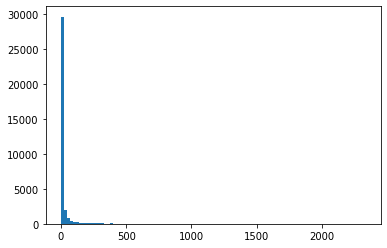

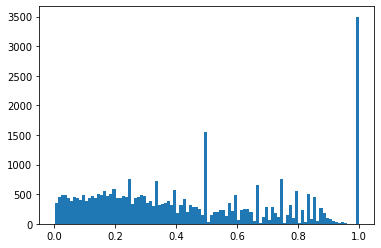

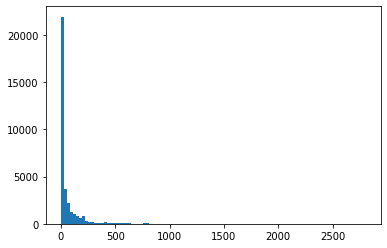

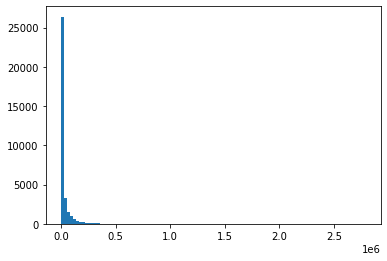

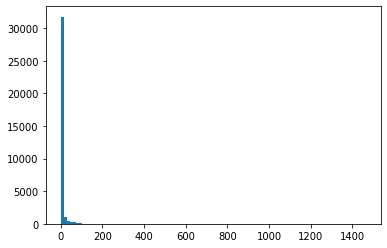

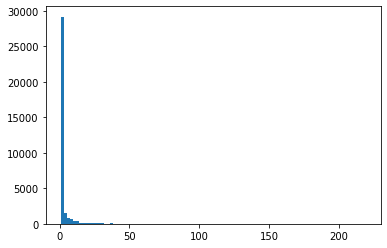

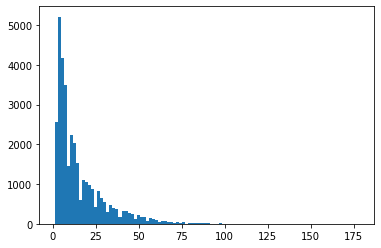

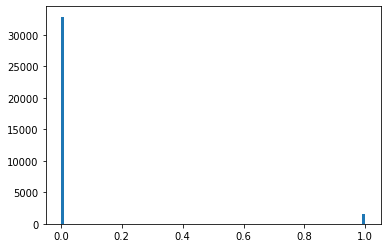

In [204]:
for i in range(X_raw_lg.shape[1]):
  plt.hist(X_raw_lg[:,i], bins=100)
  plt.show()


In [205]:
for i in range(7):
  X_raw_lg[:,i] = np.log(X_raw_lg[:,i] + 0.00000001)

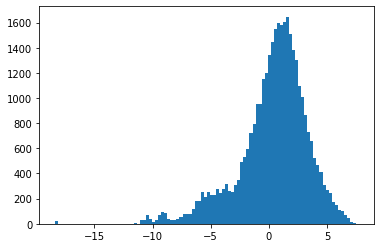

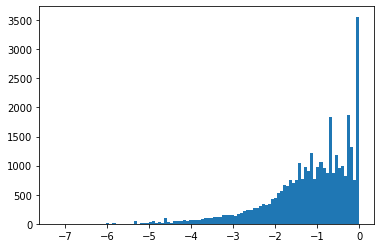

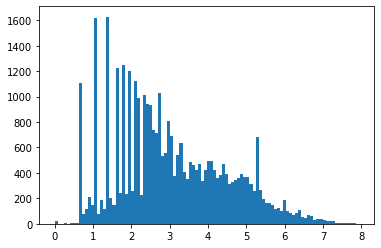

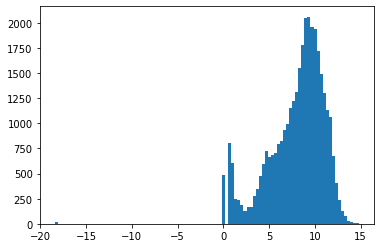

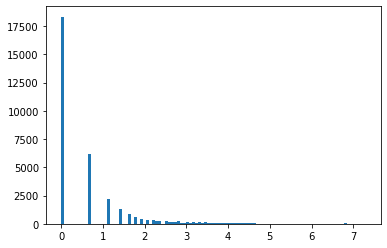

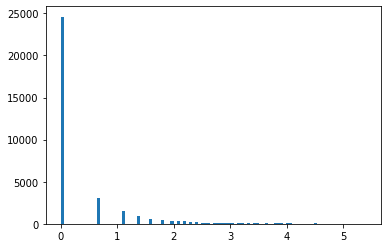

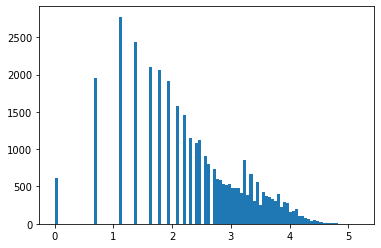

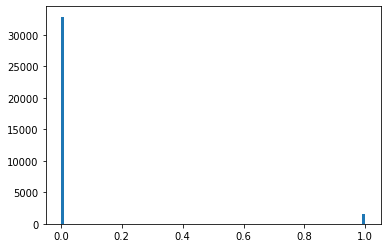

In [206]:
for i in range(X_raw_lg.shape[1]):
  plt.hist(X_raw_lg[:,i], bins=100)
  plt.show()

In [207]:
X_lg = stats.zscore(X_raw_lg, axis=0)
X_lg[1:3,:]

array([[ 1.20582608, -0.20623597,  1.14836005,  1.54496218, -0.66679172,
        -0.51139441,  1.0301832 , -0.21515855],
       [ 0.97367931, -0.12158278,  0.47325321,  1.00178364, -0.66679172,
        -0.51139441,  0.10180553, -0.21515855]])

Ready to test 

In [213]:
X_train_lg, _ = train_test_split(X_lg,test_size=0.3, random_state=1)
print("X_train_lg.shape",X_train_lg.shape)

X_train_lg.shape (24095, 8)


In [222]:
# Estimate the Gaussian parameters for large dataset
mu_lg, var_lg = estimate_gaussian(X_lg)    

# Evaluate the probabilites for the training set
p_lg = calc_multivariate_gaussian(X_train_1, mu_lg, var_lg)

# Evaluate the probabilites for the validation set
p_val_lg = calc_multivariate_gaussian(X_val, mu_lg, var_lg)


# Find the best threshold
epsilon_lg, F1_lg, tp_lg, fp_lg, fn_lg  = select_threshold(y_val, p_val_lg)
anomalies_lg = sum(p_val_lg < epsilon_lg)
print('Best epsilon found using cross-validation: %e'% epsilon_lg)
print('Best F1 on Cross Validation Set:  %f'% F1_lg)
print('Model Reported Anomalies: %d'% anomalies_lg)
actual_anomalies_lg = np.count_nonzero(y_val == 1)
print(f"Actual Number of Anomalies: {actual_anomalies_lg}")

Best epsilon found using cross-validation: 1.007867e-05
Best F1 on Cross Validation Set:  0.811475
Model Reported Anomalies: 264
Actual Number of Anomalies: 224


In [218]:
print("Cross Validation Sample Results")
print(f"True positives = {tp_lg}")
print(f"False positives = {fp_lg}")
print(f"False negatives = {fn_lg}")

Cross Validation Sample Results
True positives = 198
False positives = 66
False negatives = 26


In [219]:
print("Smaller Training Dataset")
print(f"Anomalies Detected: {anomalies}")
print(f"F1 Score: {F1}")
print("\n")
print("Larger Training Dataset")
print(f"Anomalies Detected: {anomalies_lg}")
print(f"F1 Score: {F1_lg}")

Smaller Training Dataset
Anomalies Detected: 267
F1 Score: 0.8024439918533605


Larger Training Dataset
Anomalies Detected: 264
F1 Score: 0.8114754098360656


In [220]:
print("Smaller Training Dataset Validation Results:")
print(f"True positives = {tp}")
print(f"False positives = {fp}")
print(f"False negatives = {fn}")
print("\n")
print("Larger Training Dataset Validation Results:")
print(f"True positives = {tp_lg}")
print(f"False positives = {fp_lg}")
print(f"False negatives = {fn_lg}")

Smaller Training Dataset Validation Results:
True positives = 197
False positives = 70
False negatives = 27


Larger Training Dataset Validation Results:
True positives = 198
False positives = 66
False negatives = 26


Investigate K-Means Clustering

In [251]:
# Computes the centroid memberships for every example

def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(0, len(idx)):
        distances = []
        for k in range(0, K):
            d_ik = (X[i] - centroids[k])**2
            sum = 0.0
            for p in d_ik:
                sum += p
            distances.append(sum)
        min_dist = min(distances)
        k_index = distances.index(min_dist)
        idx[i] = k_index

    
    return idx

In [112]:
# Returns the new centroids by computing the means of the data points assigned to each centroid.
def compute_centroids(X, idx, K):
    """    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m, n = X.shape
    centroids = np.zeros((K, n))

    # Gets the count of items in each centroid 
    centroid_count = np.zeros((K,))
    centroid_index_list = []
    # Makes a list of centroid indexes for next step (allows for easier loop check)
    for i in range(K):
        centroid_index_list.append(i)
    
    # Calculate total number of items associated with each centroid
    for i in range(m):
        k_index = idx[i]
        if k_index in centroid_index_list:
            centroid_count[k_index] += 1

    # Loops through all of the data points/items        
    for i in range(m):
        k_index = idx[i]
        for j in range(n):
            # To avoid a second set for loops, divide by average at each item in summation
            averaged_sum = X[i][j] / centroid_count[k_index]
            centroids[k_index][j] += averaged_sum

    return centroids

In [113]:
# This function initializes K centroids that are to be used in K-Means on the dataset X
def kMeans_init_centroids(X, K):
    """
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [114]:
# Runs the K-Means algorithm on data matrix X, where each row of X is a single example
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # # Optionally plot progress
        # if plot_progress:
        #     plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
        #     previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

    # plt.show() 
    return centroids, idx

In [242]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 2                       
max_iters = 30               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_train_1, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_train_1, initial_centroids, max_iters) 

K-Means iteration 0/29
K-Means iteration 1/29
K-Means iteration 2/29
K-Means iteration 3/29
K-Means iteration 4/29
K-Means iteration 5/29
K-Means iteration 6/29
K-Means iteration 7/29
K-Means iteration 8/29
K-Means iteration 9/29
K-Means iteration 10/29
K-Means iteration 11/29
K-Means iteration 12/29
K-Means iteration 13/29
K-Means iteration 14/29
K-Means iteration 15/29
K-Means iteration 16/29
K-Means iteration 17/29
K-Means iteration 18/29
K-Means iteration 19/29
K-Means iteration 20/29
K-Means iteration 21/29
K-Means iteration 22/29
K-Means iteration 23/29
K-Means iteration 24/29
K-Means iteration 25/29
K-Means iteration 26/29
K-Means iteration 27/29
K-Means iteration 28/29
K-Means iteration 29/29


In [243]:
idx.shape

(1017,)

In [250]:
err = calc_cat_err(y_train_1, idx)
print(f"Classification error: {err:0.5f}")
print(f"Percent error: {err*100:0.2f}%")




Number of incorrect predictions: 3
Correct predictions: 1014 out of 1017

Classification error: 0.00295
Percent error: 0.29%


Test our cluster model on new data, check for overfitting

In [252]:
idx_val = find_closest_centroids(X_val, centroids)

In [253]:
idx_val.shape

(678,)

In [254]:
err = calc_cat_err(y_val, idx_val)
print(f"Classification error: {err:0.5f}")
print(f"Percent error: {err*100:0.2f}%")




Number of incorrect predictions: 4
Correct predictions: 674 out of 678

Classification error: 0.00590
Percent error: 0.59%
